# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [43]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


## Load the data

Load the ‘Bank_data.csv’ dataset.

In [44]:
datatemp = pd.read_csv("Bank_data (1).csv")
datatemp.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [45]:
data = datatemp.copy()
data = data.drop(['Unnamed: 0'], axis = 1)
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [46]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [47]:
y = data['y']
x = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [48]:
x1 = sm.add_constant(x)
reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.2121
Time:                        18:27:59   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

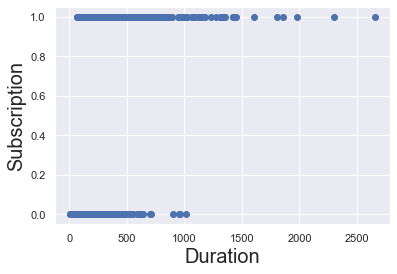

In [49]:
plt.scatter(x,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [50]:
X_all = data[['interest_rate','credit','march','previous','duration']]
y = data['y']

In [51]:
X_all = sm.add_constant(X_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.5143
Time:                        18:28:01   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [52]:
def confusion_matrix(data,actual_values,model):
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [53]:
confusion_matrix(X_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [54]:
raw_data2 = pd.read_csv('Bank_data_testing.csv')
data_test = raw_data2.copy()
data_test = data_test.drop(['Unnamed: 0'], axis = 1)

In [55]:
data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [56]:
y_test = data_test['y']
X1_test = data_test[['interest_rate','credit','march','previous','duration']]
X_test = sm.add_constant(X1_test)

In [57]:
confusion_matrix(X_test, y_test, results_logit)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.